# AR(1) + AR(2)

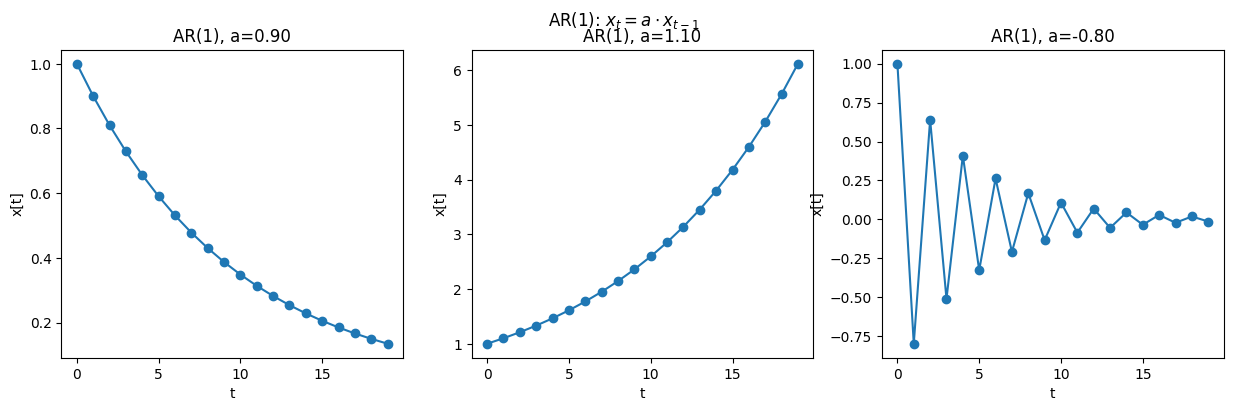

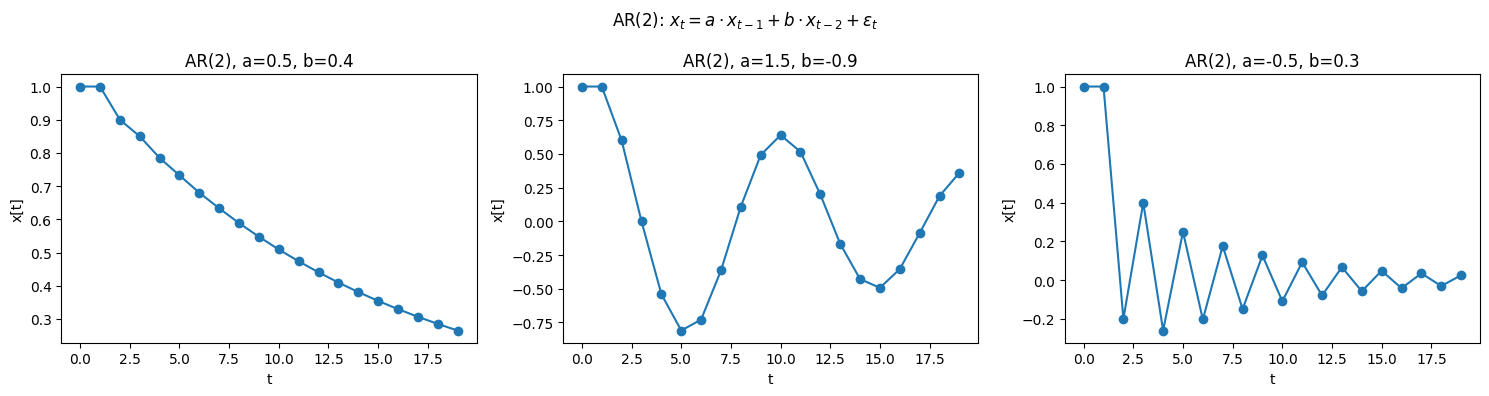

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# AR(1): x_t = a * x_{t-1}
def generate_ar1(length, a, x0=1):
    x = [x0]
    for _ in range(length - 1):
        x.append(a * x[-1])
    return np.array(x)

# AR(2): x_t = a * x_{t-1} + b * x_{t-2}
def generate_ar2(length, a, b, x0=1, x1=1):
    x = [x0, x1]
    for _ in range(2, length):
        x.append(a * x[-1] + b * x[-2])
    return np.array(x)

# Erzeuge Daten
length = 20
ar1_examples = [
    generate_ar1(length, 0.9),
    generate_ar1(length, 1.1),
    generate_ar1(length, -0.8)
]
ar2_examples = [
    generate_ar2(length, 0.5, 0.4),
    generate_ar2(length, 1.5, -0.9),
    generate_ar2(length, -0.5, 0.3)
]

# Plot AR(1)
fig1, axs1 = plt.subplots(1, 3, figsize=(15, 4))
for i, x in enumerate(ar1_examples):
    axs1[i].plot(x, marker='o')
    axs1[i].set_title(f"AR(1), a={x[1]/x[0]:.2f}")
    axs1[i].set_xlabel("t")
    axs1[i].set_ylabel("x[t]")
fig1.suptitle("AR(1): $x_t = a \cdot x_{t-1}$")

# Plot AR(2)
fig2, axs2 = plt.subplots(1, 3, figsize=(15, 4))
params_ar2 = [(0.5, 0.4), (1.5, -0.9), (-0.5, 0.3)]
for i, x in enumerate(ar2_examples):
    a, b = params_ar2[i]
    axs2[i].plot(x, marker='o')
    axs2[i].set_title(f"AR(2), a={a}, b={b}")
    axs2[i].set_xlabel("t")
    axs2[i].set_ylabel("x[t]")
fig2.suptitle("AR(2): $x_t = a \cdot x_{t-1} + b \cdot x_{t-2} + \\varepsilon_t$")

plt.tight_layout()
plt.show()


# AR(1) + AR(2) mit Rauschen

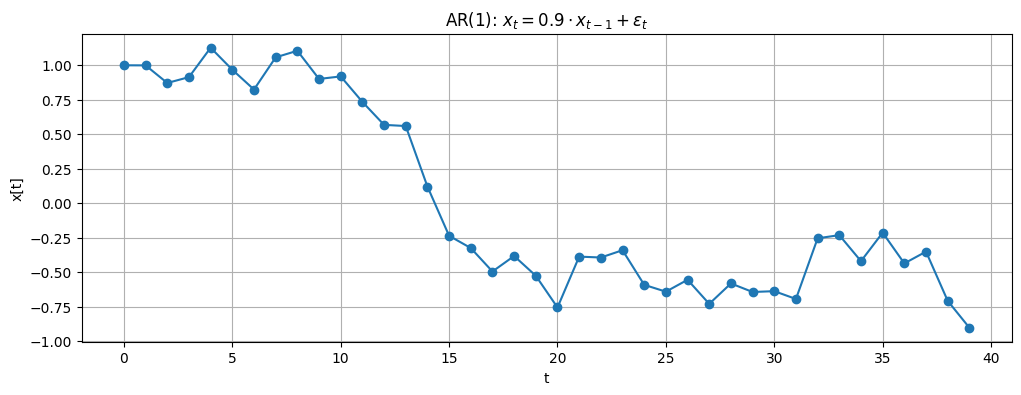

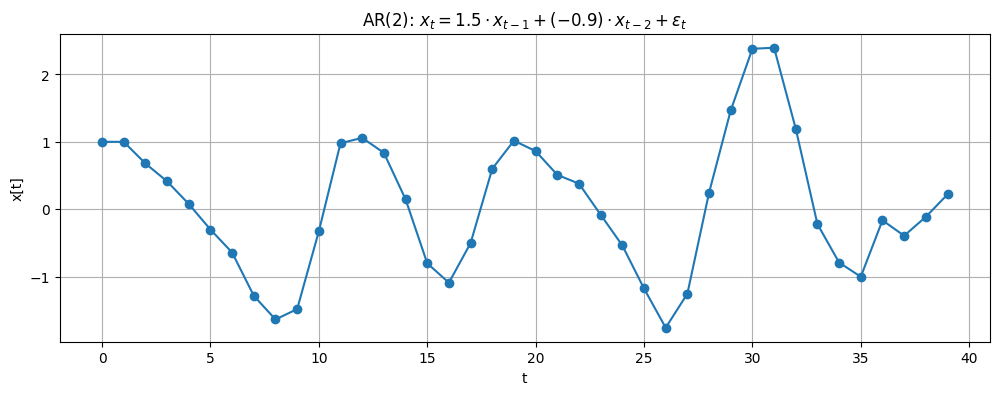

In [15]:
# AR(1) mit Rauschen: x_t = a * x_{t-1} + ε_t
def generate_ar1_noise(length, a, sigma=0.5, x0=1):
    x = [x0]
    for _ in range(length - 1):
        noise = np.random.normal(0, sigma)
        x.append(a * x[-1] + noise)
    return np.array(x)

# AR(2) mit Rauschen: x_t = a * x_{t-1} + b * x_{t-2} + ε_t
def generate_ar2_noise(length, a, b, sigma=0.5, x0=1, x1=1):
    x = [x0, x1]
    for _ in range(2, length):
        noise = np.random.normal(0, sigma)
        x.append(a * x[-1] + b * x[-2] + noise)
    return np.array(x)

# Erzeuge Daten mit Rauschen
np.random.seed(42)  # für Reproduzierbarkeit
length = 40
ar1_noise = generate_ar1_noise(length, 0.9, sigma=0.2)
ar2_noise = generate_ar2_noise(length, 1.5, -0.9, sigma=0.4)

# Plot AR(1) mit Rauschen
plt.figure(figsize=(12, 4))
plt.plot(ar1_noise, marker='o')
plt.title("AR(1): $x_t = 0.9 \cdot x_{t-1} + \\varepsilon_t$")
plt.xlabel("t")
plt.ylabel("x[t]")
plt.grid(True)
plt.show()

# Plot AR(2) mit Rauschen
plt.figure(figsize=(12, 4))
plt.plot(ar2_noise, marker='o')
plt.title("AR(2): $x_t = 1.5 \cdot x_{t-1} + (-0.9) \cdot x_{t-2} + \\varepsilon_t$")
plt.xlabel("t")
plt.ylabel("x[t]")
plt.grid(True)
plt.show()
